# Module 3B

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union


import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# omd
import datetime
import importlib
import sys

sys.path.append('../../My-Code/')

import timetools as tt

importlib.reload(tt)

print('timetools version: {}'.format(tt.__version__))
print('statsmodels version: {}'.format(sm.__version__))

timetools version: 01.15.2022
statsmodels version: 0.13.1


### Two random walks  

Random walks are not stationarity.  However, the Dickey-Fuller test fails to capture it for the two randomw walks below.

In [2]:
em = pd.read_csv('./data/em.csv')
en = pd.read_csv('./data/en.csv')

Test Statistic                -1.408614e+01
p-value                        2.773331e-26
#Lags Used                     1.000000e+00
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64

The time series is stationary.


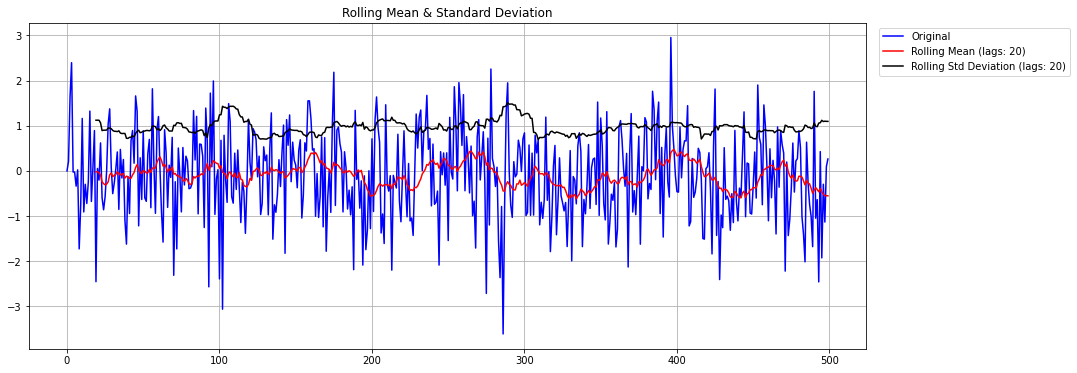

In [3]:
tt.adf(em['em'])
tt.plot_for_stationary(em['em'])

Test Statistic                -1.739714e+01
p-value                        4.971003e-30
#Lags Used                     1.000000e+00
Number of Observations Used    4.980000e+02
Critical Value (1%)           -3.443549e+00
Critical Value (5%)           -2.867361e+00
Critical Value (10%)          -2.569870e+00
dtype: float64

The time series is stationary.


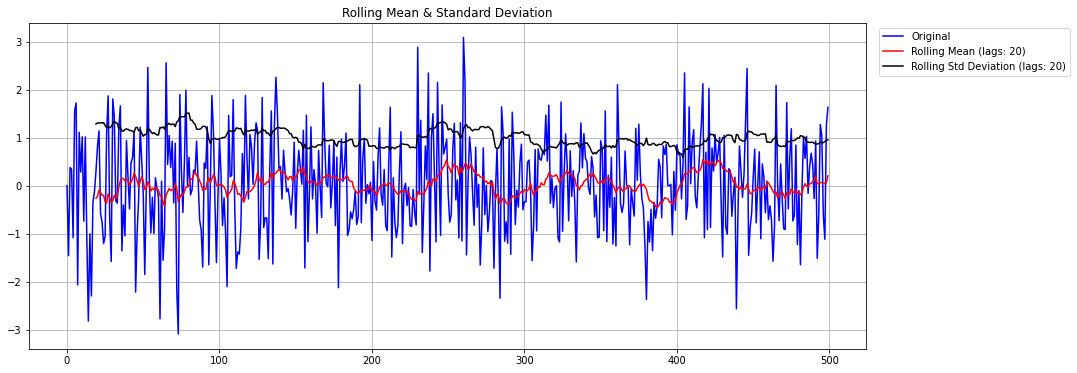

In [4]:
tt.adf(en['en'])
tt.plot_for_stationary(en['en'])

<img src='./figures/nonstationarity.png'></img>

<img src='./figures/nonstationarity.png'></img>
<img src='./figures/DF Test.png'></img>  
<img src='./figures/ADF Test.png'></img>   

Adolfo Barajas: Ok,
now, we're ready to address the third question
about nonstationary series, which is, how do you
determine whether a series is nonstationary?
The first group of tests, the traditional tests,
are what we call unit root tests,
so that's what we're going to be looking at in this lecture.
So remember the key questions:
What is nonstationarity?
Why is it important?
We covered those.
So now, we're addressing the third question,
which is, how do we determine whether a time series is nonstationary?
The first type of tests, as I said, are unit root tests.
So let's start out with the simple AR(1) model.
You have y as a function of its lag and the white noise disturbance.
The special case of random walk we saw earlier is when b is equal to 1.
So y is simply a function of its lag--is
equal to its lag plus the disturbance.
We could also add a drift to that.
Therefore, stationarity requires that b, in absolute terms,
be less than 1.
So if we want to generalize this principle to an ARP,
it boils down to this polynomial that we've expressed here.
All of the roots of that polynomial should be greater than 1
in absolute value.
That assures stationarity.

So if one of the roots of this polynomial is equal to 1,
then y is said to have a unit root, and therefore is nonstationary.

So in the AR(1) model, again, we have that simple expression,
we can test for whether y is a driftless random walk,
and essentially, we're testing for whether this coefficient is equal to 1.
So the null hypothesis could be b equal to 1,
or equivalently, we can take differences,
and change in y_t is y_t minus y_t-1,
and you can see that the expression changes slightly.
Here, we don't have b.
Now, we have psi.
And this is going to be equal to b minus 1.
So testing for b equal to 1 will be equivalent to testing
for psi being equal to 0.

So this is essentially the classic Dickey-Fuller test.
It takes this regression, and tests for whether,
when you regress y difference on its lag,
whether that coefficient that we obtained from the regression
is significantly different from 0.
So you regress change of y on its lag, and test
for significance of the coefficient.
However, standard distributions, so this is going to generate a t-stat.
But the significance levels will have to come from a different distribution.
This doesn't follow the traditional t distribution.

And we can extend this simple Dickey-Fuller test to include an intercept.
In the previous slide, we didn't have an intercept.
So we can include a Mu.
We can include a Mu plus a time trend.
And in all three cases, we'd be testing whether the coefficient on the lag term
is equal to 0, which would be an indication of y having a unit root.
So in these tests, when you reject the test,
that is when you find that y is stationary.
So y is stationary is a rejection of the test.
These are unit root tests in the sense that you're
testing for whether y has a unit root.
If you reject it, then what you're saying is that y is stationary.
So the critical values for the t-stats will vary,
but you'll have a different one depending
on each one of these specifications--whether you have an intercept, trend,
or both included.
Dickey-Fuller produce tables and critical values for all of these tests.
So some terminology.
We talk about order of integration.
So the order of integration, essentially,
is the number of times you have to difference a series in order for it
to be stationary.
So if we say, y is integrated of order 0,
that means you don't need any differencing
to produce a stationary series.
So I(0) series is a stationary series.

I(0) means it is stationary.
And another way of thinking of it is that it's stationary in level.
So in other words, no differencing needed.

So if y is I(1), then it means that it's first difference.
It has to be differenced once in order to produce a stationary series.
So when I(1), would need to be differenced once.
And so on.
So when I(2), means that you need to difference y twice.
So the difference of the difference of y would be stationary.

But neither y nor its first difference are stationary.

So up to now, we've assumed, in these three examples we gave,
we've assumed that that disturbance is white noise.
But epsilon may not be white noise.
If epsilon is autocorrelated, then this gets us
into higher-order lags for the tests.
So there's a different version of the test,
which is what's called the augmented Dickey-Fuller test.
And it's generalized to a lag p, where you
have a general equation that allows for an intercept, time
trend, and a number of lags, up to p.
And essentially, you're going to continue to test
for gamma being equal to 0 or not.
And gamma turns out to be a function of the sum of these
are the auto-regressive coefficients of the residual.
So it turns out that if gamma equals 0, it
means that the sum of these beta Is, the sum is equal to 1.
And that's perfectly consistent with the condition that
says it if the sum of auto-regressive coefficients is equal to 1,
then there must be some unit root in the system.
So this is consistent with a unit root.

So it simplifies.
This expression simplifies to just the one condition on gamma.
You're testing for whether gamma is equal to 0 or not.
So that the ADF test, we're also testing whether the coefficient
on the lagged variable, y_t-1, is equal to 0 or not.
And you have to make choices.
Do you include an intercept?
A trend?
Both?
None?
And how many lags?
So traditionally, you would need to look at the different criteria--AIC,
SBC--and you could adopt a general-to-specific approach.
Start out with a large p, then re-estimate
with successively smaller ps as you go along.
Now EViews will simplify this for you.
If you ask for a unit root test, if you ask for the ADF test,
it will choose the optimum lag p, based on any one of these criteria.
And what's recommended, generally, is to ask it to choose the AIC criteria.
As we saw earlier, SBC tends to choose more parsimonious models.
And there may be some risk of some lingering autocorrelation
if we get too parsimonious with the lag structure in this test.
So it's recommended to ask EViews, when you set up the ADF
test, to use the AIC as the criteria for choosing the optimum lag
structure in the test.
So that gives a good introduction into the basic augmented
Dickey-Fuller tests to see if a series is nonstationary.
And again, these have the property that the null hypothesis is nonstationarity.
`So if you reject the test, you're saying that the series is stationary.
In the next lecture, we're going to look at some additional tests which
try to correct for a few deficiencies that have been found in the DF and ADF
tests.`

<img src='./figures/alternative1 to adf.png'></img>   
<img src='./figures/phillips-perron.png'></img>   
<img src='./figures/KPSS.png'></img>   

Adolfo Barajas: Ok,
now we're going to look at a few alternative tests
to the basic Dickey-Fuller and augmented Dickey-Fuller tests.
And now, we're not using the general term unit root test,
because one of these, in particular, operates
from the other perspective, which is its null hypothesis is stationarity rather
than nonstationarity,
and to reject it you would be accepting that the series is
nonstationary, rather than stationary.
So it's a twist.
Different way of looking at the issue.
So let's look at these additional tests.
So one thing that's been observed in the literature
is that the DF and ADF tests have been found to have
low power in certain circumstances.
One of those being where you have stationary processes
with near-unit roots.
In other words, these tests have a difficulty
distinguishing b being equal to 1--b being
the coefficient on the lagged time series--being equal to 1
or being close to 1-- say, 0.95.
And this especially is a problem in small samples.
And these tests have also been found to
have low power in the case of trend stationary processes.
Now, just as a side here:
low power means that this is the power to reject.

So through different types of simulations,
they found that when you have a stationary series with b equal, close
to 1, say 0.95, what we find is that the DF ADF failed to reject.
So they have low power to reject.
So they indicate sometimes that y is I(1), or nonstationary, when it is truly I(0).
So this is an issue that these additional tests are trying to address,
these alternative tests.
The first one is the Phillips-Perron.
This has a slightly different formulation.
It has, also, difference of y as a function of mu star plus.
Here we have a trend, trend variable that mu star could be the intercept.
And we have a psi term in addition to the disturbance.
And we start with the assumption that u_t, the disturbance,
can be I(0)-- in other words, stationary.
But it can be heteroskedastic, and uncorrelated,
and heteroskedastic meaning changing variance.

So in order to allow for this, it follows in ARMA(p,q).

There's a null hypothesis of psi being equal to 0.
And again, this is would qualify as a unit root test,
because the null is that a unit root exists.
Phillips and Perron corrects for any serial correlation
coming out of the errors, or heteroskedasticity as well.
And it does so by modifying the test statistics.
One advantage of Phillips-Perron: we don't need to specify the lag length.
So this is an alternative test, which works under, let's say,
a more general specification of the disturbances.
Then we have the KPSS test.
I'm not even going to try to pronounce all those last names.
So let's just keep it at KPSS.
So the null hypothesis--as I said, this is
one example of a test which is not a unit root test,
the null hypothesis is that y is trend stationary.
In other words, it can have a trend, but beyond that, it's stationary.
The formulation is y is a function of a variable, d_t,
plus mu_t and a disturbance.
And this disturbance here is white noise.

But the term mu_t can contain a random walk element.
it can be a function of its lag plus a separate disturbance that has mean 0.

Ok?
And d_t can contain deterministic components.
So d_t groups all of the intercepts plus time trend.

And so whatever nonstationarity might occur
is going to occur through this mu_t term.
So the test is testing whether the disturbance and the mu_t process
has variance equal to 0 or not.
If the variance is equal to 0, then mu is simply a constant,
because with mean 0, this simply goes to 0.
Mean 0, no variance.
Then, mu_t becomes a constant.
And here, this constant feeding into this equation
simply means that y_t will have a trend and an intercept.
But it will be stationary, because its disturbance is white noise,
and all it has here are deterministic components.
And the alternate hypothesis is that there's
some variance in this disturbance, which would
mean that you have some nonstationarity feeding into y through the mu term.
So the KPSS critical values are obtained by simulation methods.

<img src='./figures/stationarity notes.png'></img>   
<img src='./figures/unified way stationarity.png'></img>   

Adolfo Barajas: So a few notes on these alternative-- on all tests--brought together.
So the DF, ADF, and PP tests are called unit root tests, I mentioned earlier.
The null hypothesis is that yt has a unit root, is either I(1) or higher.
KPSS, on the other hand, is a stationarity test.
The null hypothesis is that y is stationary.
It's I(0).
Correct specification is key when you're testing the different alternatives.
Intercept and trend should be included when appropriate.
So you should have a good idea of whether you should
include an intercept and a trend.
And, of course, looking at the data, graphing the data,
can give you an idea of whether they should be in there.
Running the regression and finding the intercept and trend
are significant, of course, of course are important criteria as well.
And structural breaks can complicate matters further.
So this is an issue that's going to be taken
up more in detail, as I said earlier in the forecast module, which
is module 4.
But it's quite possible that you might have a series like this,
which suffers a structural break,
and here and here it's stationary.

But it's quite possible that if you don't take the structural break
into account when you test for non-stationarity,
the break will cause the test to indicate non-stationary.

So it's very important to take structural breaks into account.
So lastly, let me show you a different way of setting up these tests.
We've been talking about tests as being tests
on the coefficient for the lagged y, but there's
another way of expressing this, the unit root test in particular.
So if we express it slightly differently,
we have y_t as a function of a constant mu, the time
trend, and the disturbance.
We can pick up any non-stationarity that might be occurring.
We can pick it up through the disturbance itself.
So we can say whatever non-stationarity occurs in y
is coming through the disturbance.
So in essence, we could be testing this autoregressive coefficient
on the disturbance itself.
And here, with mu and alpha, we're picking up
the deterministic portion of y.
So we could think of this as testing for row.
Row being 1 would amount to y having a unit root.
And absolute value of row less than 1, y would end up being stationary,
because then this residual here feeds into y as a stationary variable.
So if epsilon_t, the residual on u, is white noise, then we can use
then we can use the traditional Dickey-Fuller test.
But depending on how epsilon t behaves, if it's an ARMA,
if it has autoregressive elements to it, then
it's more appropriate to use ADF or PP, the Phillips Perron
test, which correct for that type of behavior in the residual.
So in essence, this is what is occurring in EViews.
Eviews uses testing not for a autoregressive coefficient on y,
but rather on the autoregressive coefficient for the residual
of that first equation.
So this is just a way of a sort of nesting the three unit root
tests that we looked at, the DF, the ADF, and the PP tests,
into one simple expression.

In [13]:
pe = pd.read_csv('./data/module3_data_PE_Ratios.csv')
pe.set_index('dateid01', inplace=True)
pe.index = pd.to_datetime(pe.index)
pe.tail()

,dateid,date,pe_aus,pe_ind,pe_ndo,pe_saf,pe_usa
dateid01,,,,,,,
2014-10-01,2014-10-31 23:59:59.999,2014-10-31,18.7117,19.3798,16.60,17.2117,17.8710
2014-11-01,2014-11-30 23:59:59.999,2014-11-28,18.0667,19.9561,16.32,17.2766,18.3112
2014-12-01,2014-12-31 23:59:59.999,2014-12-31,19.9690,19.4043,18.21,19.3109,18.4315
2015-01-01,2015-01-31 23:59:59.999,2015-01-30,20.6191,20.5922,19.12,19.8929,17.8450
2015-02-01,2015-02-28 23:59:59.999,2015-02-27,21.8822,20.6786,19.39,20.6899,18.7929


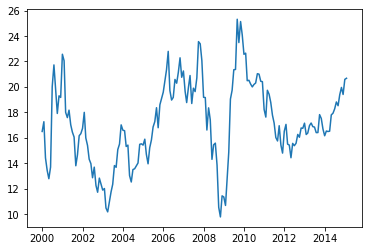

In [17]:
plt.plot(pe.loc['2000-1-1':]['pe_ind'])

In [33]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(pe.loc['2000-2':'2015-2']['pe_ind'])
pp.summary()

Test Statistic,-2.936
P-value,0.041
Lags,14


In [39]:
from statsmodels.tsa.stattools import kpss

kpss(pe.loc['2000-2':'2015-2']['pe_ind'], nlags=10)

(0.26365385966748095,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [62]:
tt.KPSS(pe.loc['2000-2':'2015-2']['pe_ind'], lags=10)

(0.26365385966748095, 0.1, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
    KPSS Stationarity Test Results   
Test Statistic                  0.264
P-value                         0.172
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [60]:
tt.adf(pe.loc['2000-2':'2015-2']['pe_ind'], lags=0)

Test Statistic                  -2.791742
p-value                          0.059463
#Lags Used                       0.000000
Number of Observations Used    180.000000
Critical Value (1%)             -3.467211
Critical Value (5%)             -2.877735
Critical Value (10%)            -2.575403
dtype: float64

The time series is not stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.792
P-value                         0.059
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [63]:
kpss(pe.loc['2000-2':'2015-2']['pe_ind'], nlags=10)

(0.26365385966748095,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [80]:
dftest = kpss(pe.loc['2000-2':'2015-2']['pe_ind'], nlags=10)
dfoutput = pd.Series(dftest[0:3], index=['Test Statistic', 'p-value', '#Lags Used'])
for key, value in dftest[3].items():
    dfoutput['Critical Value ({0})'.format(key)] = value
    
dfoutput

Test Statistic            0.263654
p-value                   0.100000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64

In [83]:
tt.adf(pe.loc['2000-2':'2015-2']['pe_ind'])

Test Statistic                  -2.791742
p-value                          0.059463
#Lags Used                       0.000000
Number of Observations Used    180.000000
Critical Value (1%)             -3.467211
Critical Value (5%)             -2.877735
Critical Value (10%)            -2.575403
dtype: float64

The time series is not stationary.
   Augmented Dickey-Fuller Results   
Test Statistic                 -2.759
P-value                         0.064
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.47 (1%), -2.88 (5%), -2.58 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [82]:
tt.KPSS(pe.loc['2000-2':'2015-2']['pe_ind'])

Test Statistic            0.263654
p-value                   0.100000
#Lags Used               10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


    KPSS Stationarity Test Results   
Test Statistic                  0.264
P-value                         0.172
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
